In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [102]:
##Reading the dataset

In [103]:
sheets = pd.read_excel("/Users/marri/OneDrive/Desktop/Regional Sales Dataset.xlsx",sheet_name = None)

In [104]:
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [105]:
df_customers.head()

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [106]:
df_regions.tail()

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
989,990,Racine,Racine County,WI,Wisconsin,City,42.72613,-87.78285,262,77742,29851,41455,40111757,8282116,America/Chicago
990,991,Waukesha,Waukesha County,WI,Wisconsin,City,43.01168,-88.23148,262,71970,28331,59547,65856921,700602,America/Chicago
991,992,West Allis,Milwaukee County,WI,Wisconsin,City,43.01668,-88.00703,414,60620,27457,45221,29480532,60789,America/Chicago
992,993,Casper,Natrona County,WY,Wyoming,City,42.86663,-106.31308,307,60285,23814,57790,68507280,911081,America/Denver
993,994,Cheyenne,Laramie County,WY,Wyoming,City,41.13998,-104.82025,307,63335,25130,58219,69964749,282335,America/Denver


In [107]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [108]:
df_sales.shape

(64104, 12)

In [109]:
df_products.head()

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [110]:
df_state_reg.head()

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [111]:
df_budgets.head()

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [112]:
##Data Cleaning

In [113]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [114]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [115]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [116]:
df_customers.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [117]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [118]:
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [119]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

In [120]:
df = df_sales.merge(df_customers,how ='left',left_on = 'Customer Name Index',right_on='Customer Index')

In [121]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [122]:
df = df.merge(df_products,how ='left',left_on = 'Product Description Index',right_on='Index')

In [123]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [124]:
df = df.merge(df_regions,how ='left',left_on = 'Delivery Region Index',right_on='id')

In [125]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [126]:
df = df.merge(
    df_state_reg[["State Code", "Region"]],
              how ='left' ,
              left_on = 'state_code',
              right_on='State Code')

In [127]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [128]:
df = df.merge(
    df_budgets,
    how= 'left',
    on= 'Product Name'
)

In [129]:
cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code']
df = df.drop(columns= cols_to_drop,errors='ignore')
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [130]:
df.columns = df.columns.str.lower()

In [131]:
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [132]:
COLUMNS_TO_KEEP = [
    'ordernumber', 'orderdate', 'channel', 'product name',
    'order quantity', 'unit price', 'line total',
    'total unit cost', 'state_code', 'county',
    'state', 'region', 'latitude', 'longitude', '2017 budgets',
    'customer names'
]

# Assistant
This error occurs because you're trying to select columns that don't exist in your DataFrame. The error message indicates that the columns 'line total', 'latitude', and 'longitude' are not present in your DataFrame's columns.

When you try to subset a DataFrame using `df[cols_to_keep]`, all the column names in `cols_to_keep` must exist in the DataFrame.

Would you like me to provide the corrected code?

In [133]:
df[COLUMNS_TO_KEEP]

,ordernumber,orderdate,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets,customer names
0,SO - 000225,2014-01-01,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270,Amerisourc Corp
3,SO - 0005614,2014-01-01,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555,Colgate-Pa Group
4,SO - 0005781,2014-01-01,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329,Deseret Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Bucks County,Pennsylvania,Northeast,40.15511,-74.82877,5685138.270,Dazzlesphe Corp
64100,SO - 0007706,2018-02-28,Export,Product 21,6,864.3,5185.8,579.081,IL,Cook County,Illinois,Midwest,42.11030,-88.03424,959899.218,Yombu Corp
64101,SO - 0007718,2018-02-28,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Broward County,Florida,South,26.24453,-80.20644,3720639.645,Bath Group
64102,SO - 0008084,2018-02-28,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,Erie County,New York,Northeast,42.91002,-78.74182,2067108.120,Linklinks Ltd


In [134]:
df.head()

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,region,2017 budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [135]:
df= df.rename(columns={
    'line total': 'revenue','latitude': 'lat','longitude':'lon'
})


In [136]:
df.head()

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,lon,area_code,population,households,median_income,land_area,water_area,time_zone,region,2017 budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [137]:
df.loc[df['orderdate'].dt.year != 2017,'2017 budgets'] = pd.NA
df[['orderdate','product name','revenue', '2017 budgets']].head()

,orderdate,product name,revenue,2017 budgets
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [138]:
df.to_csv("RSdataA1.csv")

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ordernumber                64104 non-null  object        
 1   orderdate                  64104 non-null  datetime64[ns]
 2   customer name index        64104 non-null  int64         
 3   channel                    64104 non-null  object        
 4   currency code              64104 non-null  object        
 5   warehouse code             64104 non-null  object        
 6   delivery region index      64104 non-null  int64         
 7   product description index  64104 non-null  int64         
 8   order quantity             64104 non-null  int64         
 9   unit price                 64104 non-null  float64       
 10  revenue                    64104 non-null  float64       
 11  total unit cost            64104 non-null  float64       
 12  cust

In [140]:
df_2017 = df[df['orderdate'].dt.year == 2017]

In [141]:
df_2017.head()

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,lon,area_code,population,households,median_income,land_area,water_area,time_zone,region,2017 budgets
46363,SO - 0002544,2017-01-01,107,Wholesale,USD,NXH382,711,30,6,1239.5,...,-74.02375,551,69156,23029,41107,3333346,0,America/New York,Northeast,1011609.684
46364,SO - 0006431,2017-01-01,116,Wholesale,USD,NXH382,234,13,5,1829.1,...,-108.55065,970,60358,24290,45358,101735554,921925,America/Denver,West,3720639.645
46365,SO - 0007491,2017-01-01,45,Wholesale,USD,NXH382,108,15,9,2412.0,...,-118.35313,424,111666,36667,42044,23485845,63502,America/Los Angeles,West,3299478.315
46366,SO - 0008741,2017-01-01,169,Wholesale,USD,GUT930,375,8,8,904.5,...,-90.66457,563,58799,23901,47450,78952077,2802123,America/Chicago,Midwest,1085037.329
46367,SO - 0009295,2017-01-01,20,Wholesale,USD,NXH382,339,2,12,1112.2,...,-82.52546,352,100270,39038,41308,154983928,6194314,America/New York,South,3050087.565


In [142]:
##EDA

In [143]:
df['total cost'] = df['order quantity']*df['total unit cost']

In [144]:
df['profit']= df['revenue']-df['total cost']
df['profit margin'] = df['profit']/df['revenue']*100
df.head()

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,households,median_income,land_area,water_area,time_zone,region,2017 budgets,total cost,profit,profit margin
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,52798,36466,268318796,13908113,America/New York,South,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,26020,124759,62489257,386195,America/Los Angeles,West,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,24141,63158,70972793,720300,America/New York,Northeast,NaN,10082.160,8249.040,45.0


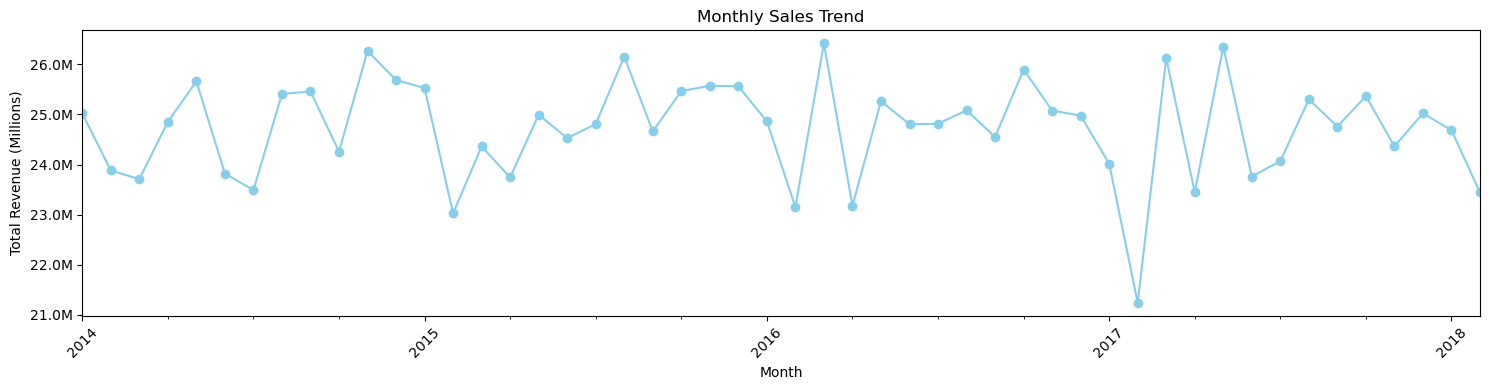

In [145]:
df['ordermonth']= df['orderdate'].dt.to_period('M')
monthlysales = df.groupby('ordermonth')['revenue'].sum()

plt.figure(figsize=(15,4))

monthlysales.plot(marker ='o',color='skyblue')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

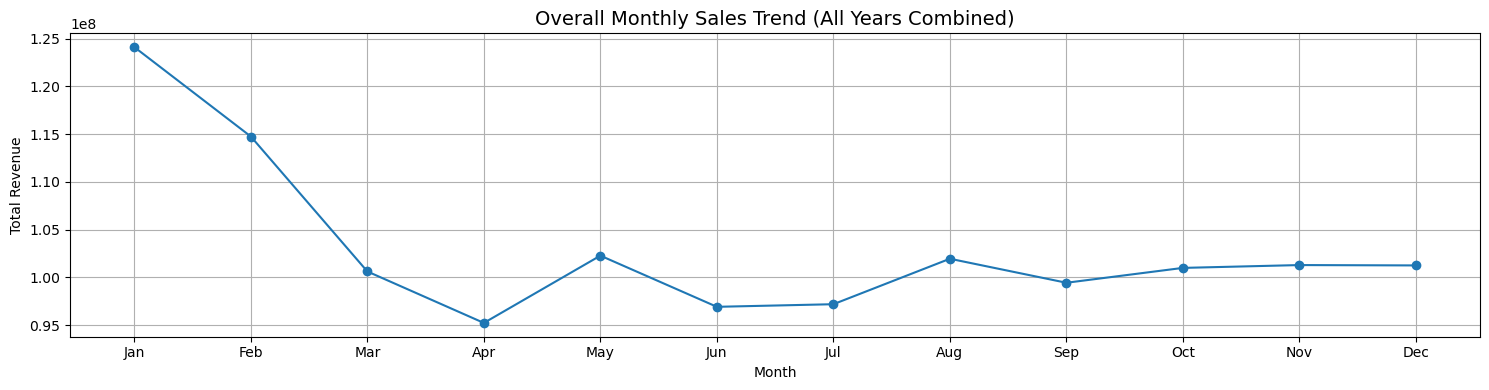

In [146]:
df['orderdate'] = pd.to_datetime(df['orderdate'])

# Extract month name and month number for sorting and display
df['month'] = df['orderdate'].dt.month
df['month_name'] = df['orderdate'].dt.strftime('%b')  #

# Group by month and sum revenue
monthly_sales = df.groupby(['month', 'month_name'])['revenue'].sum().reset_index()

# Sort by month number to ensure correct order in plot
monthly_sales = monthly_sales.sort_values('month')

# Plot
plt.figure(figsize=(15, 4))
plt.plot(monthly_sales['month_name'], monthly_sales['revenue'], marker='o')
plt.title('Overall Monthly Sales Trend (All Years Combined)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


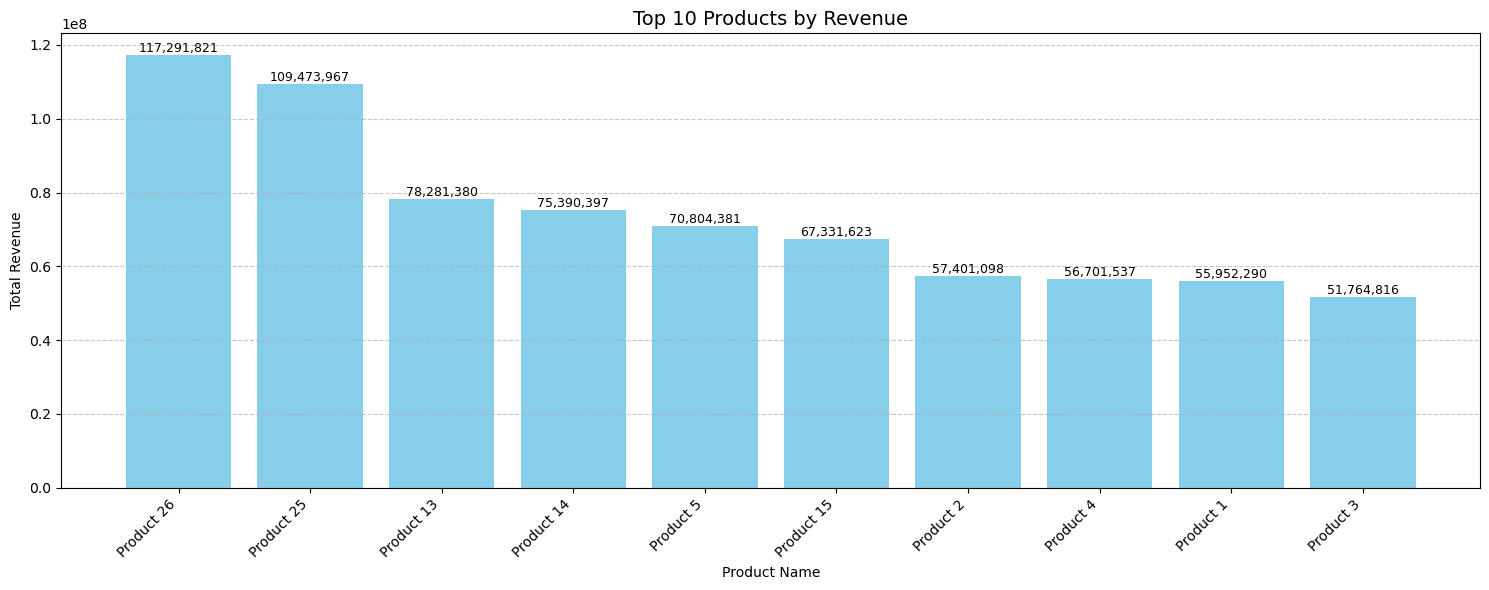

In [147]:
top_products = df.groupby('product name')['revenue'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(15, 6))
bars = plt.bar(top_products.index, top_products.values, color='skyblue')

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', 
             ha='center', va='bottom', fontsize=9)

plt.title('Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


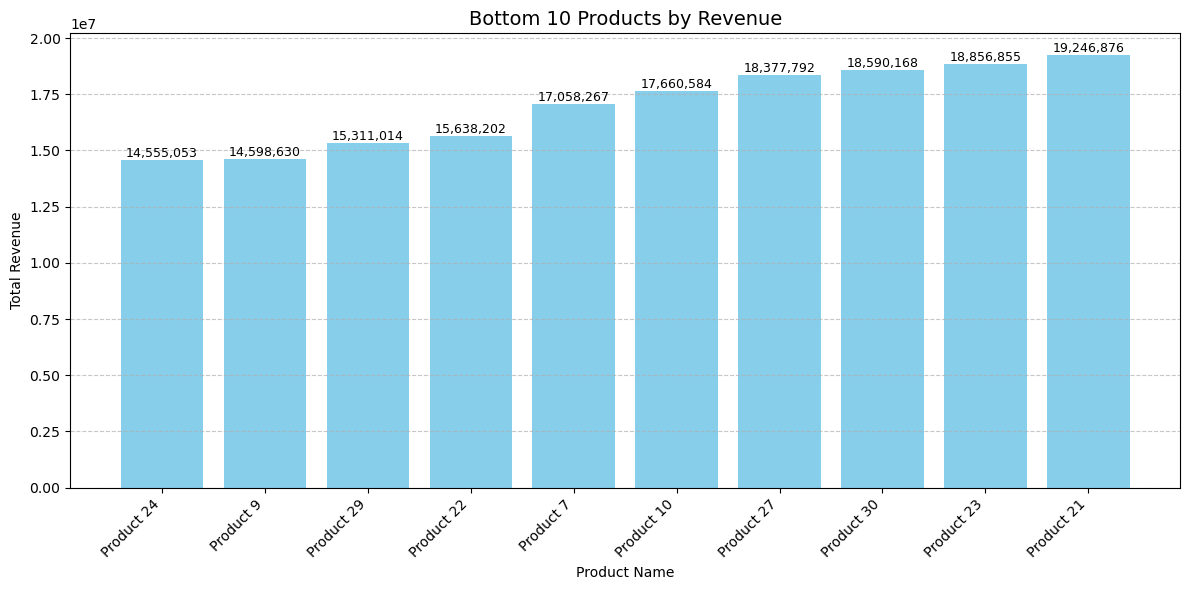

In [148]:
bottom_products = df.groupby('product name')['revenue'].sum().sort_values(ascending=True).head(10)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(bottom_products.index, bottom_products.values, color='skyblue')

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', 
             ha='center', va='bottom', fontsize=9)

plt.title('Bottom 10 Products by Revenue', fontsize=14)
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


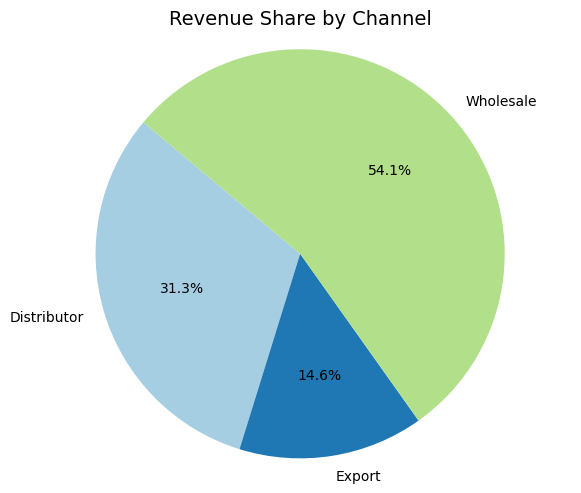

In [149]:
channel_revenue = df.groupby('channel')['revenue'].sum()

# Plot pie chart
plt.figure(figsize=(6, 5))
plt.pie(channel_revenue, labels=channel_revenue.index, 
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Revenue Share by Channel', fontsize=14)
plt.axis('equal') 
plt.tight_layout()
plt.show()


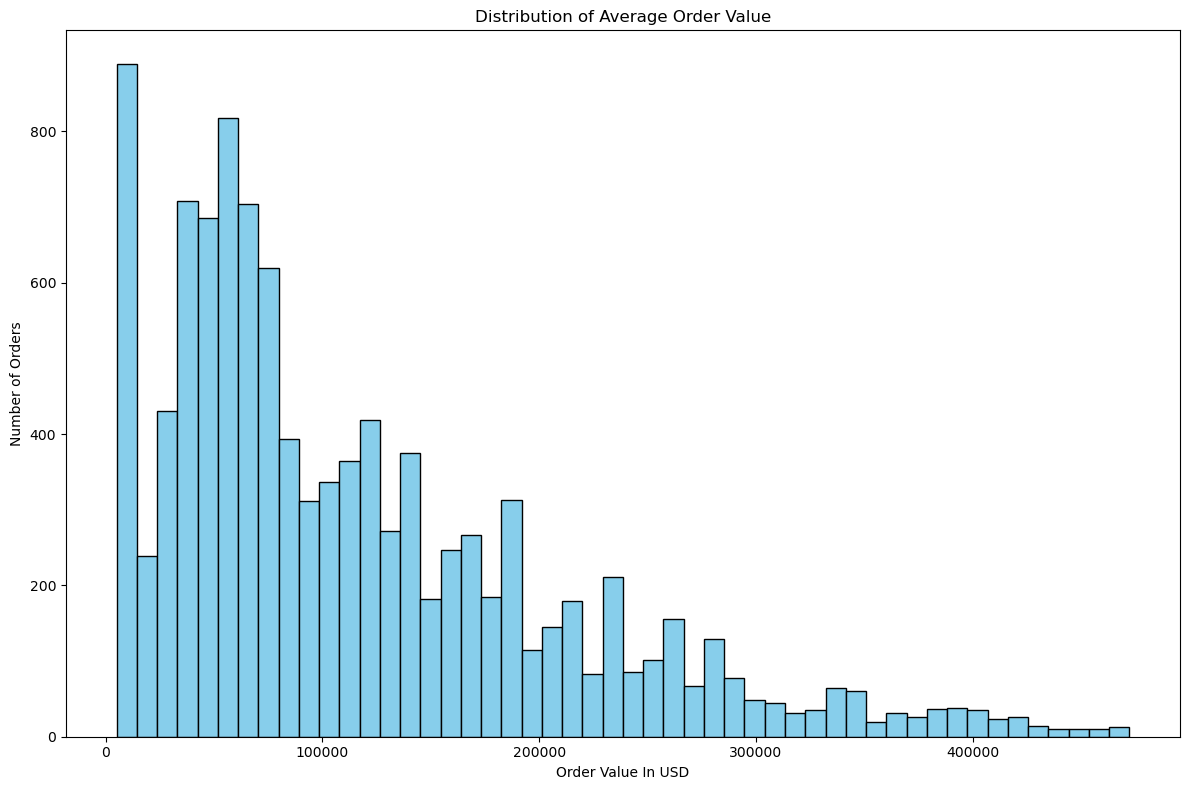

In [150]:
aov= df.groupby('ordernumber')['revenue'].sum()
plt.figure(figsize=(12,8))
plt.hist(
    aov,
    bins=50,
    color='skyblue',edgecolor='black'
)
plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value In USD')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

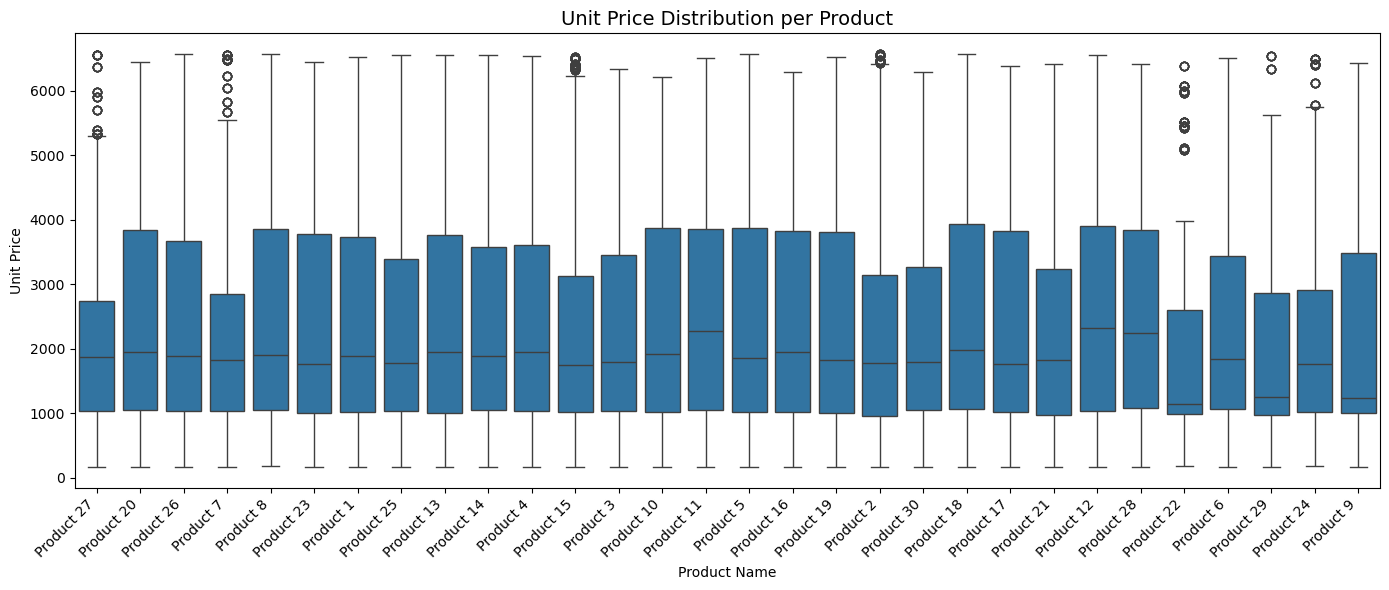

In [151]:
plt.figure(figsize=(14, 6))

# Create boxplot
sn.boxplot(data=df, x='product name', y='unit price')

# Customize plot
plt.title('Unit Price Distribution per Product', fontsize=14)
plt.xlabel('Product Name')
plt.ylabel('Unit Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


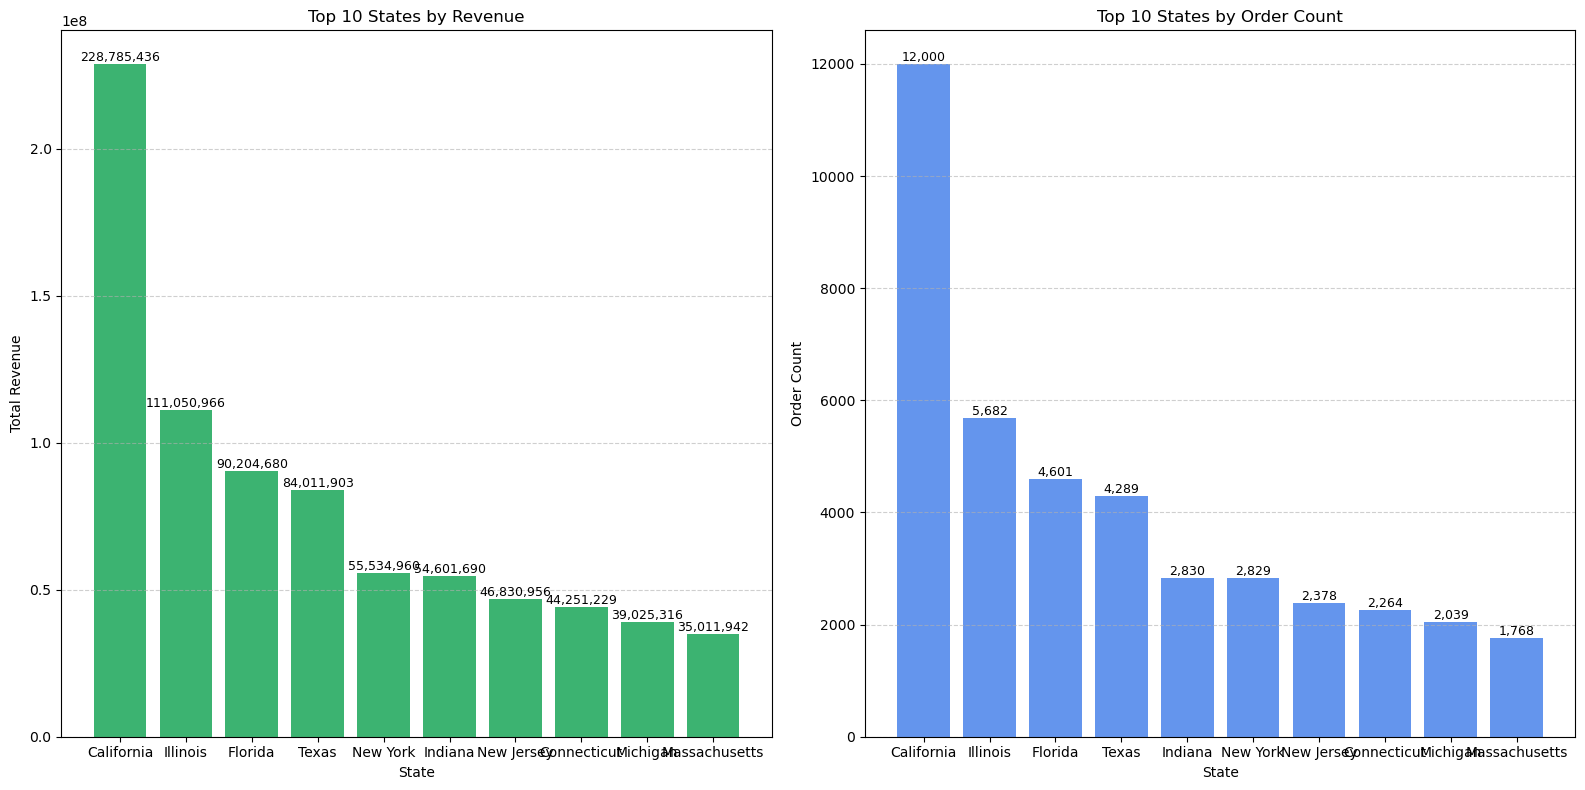

In [152]:
# Group by state and compute revenue and order count
state_stats = df.groupby('state').agg({
    'revenue': 'sum',
    'ordernumber': 'count'  # assumes each row is an order
}).rename(columns={'ordernumber': 'order_count'}).reset_index()

# Sort and get top 10
top_revenue = state_stats.sort_values(by='revenue', ascending=False).head(10)
top_orders = state_stats.sort_values(by='order_count', ascending=False).head(10)

# Set up the subplot layout
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# --- Left chart: Revenue ---
bars1 = axes[0].bar(top_revenue['state'], top_revenue['revenue'], color='mediumseagreen')
axes[0].set_title('Top 10 States by Revenue')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Total Revenue')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)
for bar in bars1:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=9)

# --- Right chart: Order Count ---
bars2 = axes[1].bar(top_orders['state'], top_orders['order_count'], color='cornflowerblue')
axes[1].set_title('Top 10 States by Order Count')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Order Count')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)
for bar in bars2:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,}', ha='center', va='bottom', fontsize=9)

# Final layout adjustments
plt.tight_layout()
plt.show()


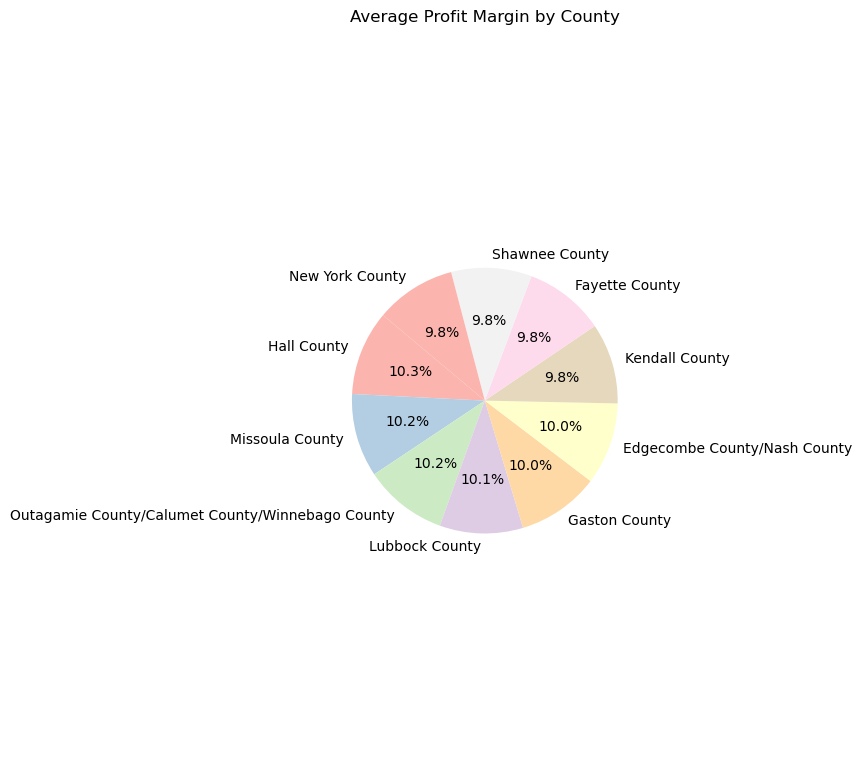

In [153]:
df = df.dropna(subset=['profit margin'])

# Group by county and calculate average profit margin
county_margin = df.groupby('county')['profit margin'].mean()

# Optional: limit to top N counties to avoid clutter (e.g., top 10 by avg margin)
county_margin = county_margin.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 8))
plt.pie(county_margin, labels=county_margin.index, autopct='%1.1f%%', 
        startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Average Profit Margin by County')
plt.axis('equal')
plt.tight_layout()
plt.show()


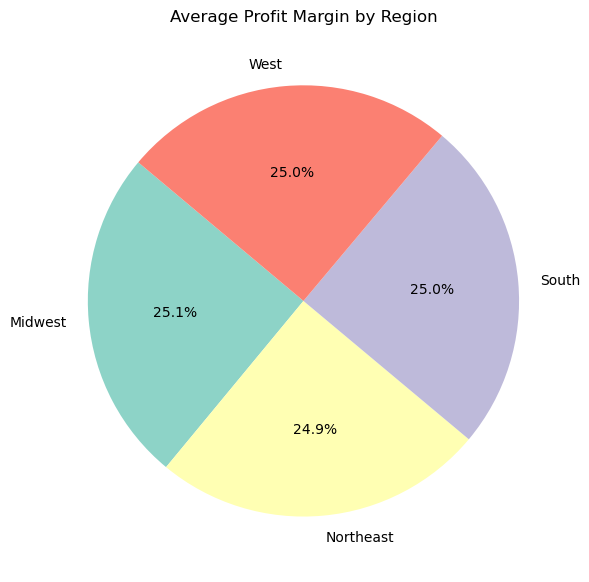

In [154]:
region_margin = df.groupby('region')['profit margin'].mean()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(region_margin, labels=region_margin.index, autopct='%1.1f%%', 
        startangle=140, colors=plt.cm.Set3.colors)
plt.title('Average Profit Margin by Region')
plt.axis('equal')
plt.tight_layout()
plt.show()


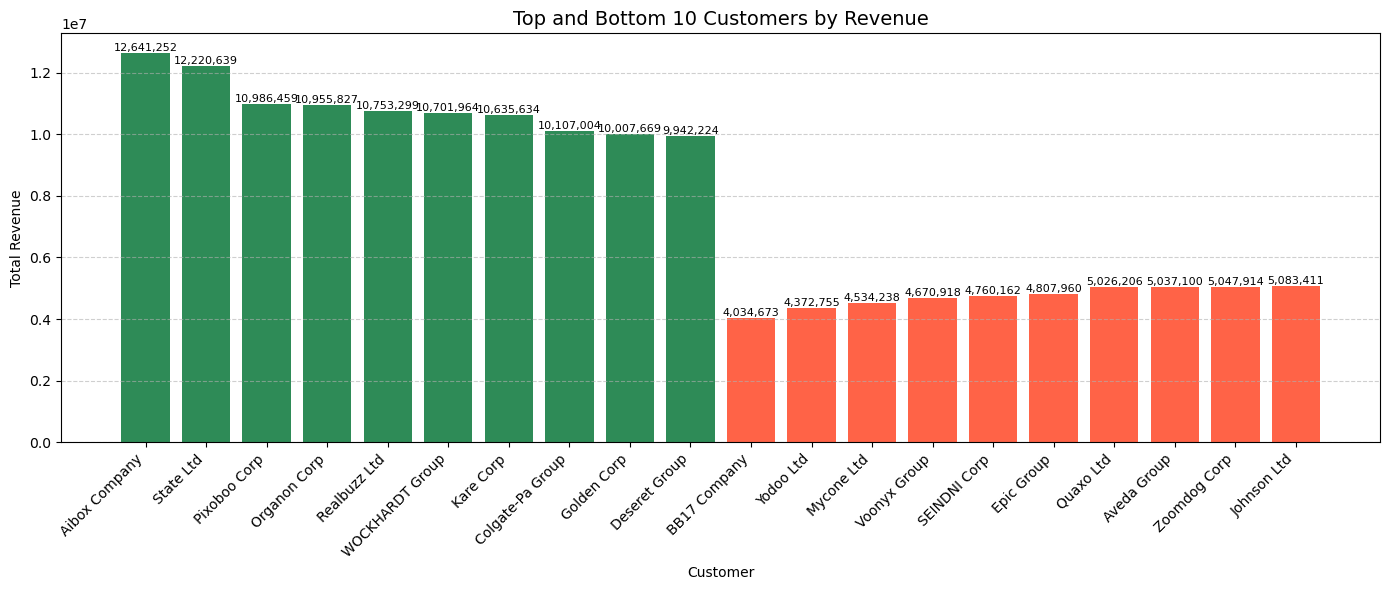

In [156]:
customer_revenue = df.groupby('customer names')['revenue'].sum()

# Get top and bottom 10 customers by revenue
top_10 = customer_revenue.sort_values(ascending=False).head(10)
bottom_10 = customer_revenue.sort_values(ascending=True).head(10)

# Combine into a single DataFrame
combined = pd.concat([top_10, bottom_10])

# Assign a label for color coding
labels = ['Top 10'] * len(top_10) + ['Bottom 10'] * len(bottom_10)

# Create DataFrame for plotting
combined_df = pd.DataFrame({
    'customer': combined.index,
    'revenue': combined.values,
    'group': labels
})

# Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(combined_df['customer'], combined_df['revenue'], 
               color=combined_df['group'].map({'Top 10': 'seagreen', 'Bottom 10': 'tomato'}))

# Add labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', 
             ha='center', va='bottom', fontsize=8)

# Final touches
plt.title('Top and Bottom 10 Customers by Revenue', fontsize=14)
plt.xlabel('Customer')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


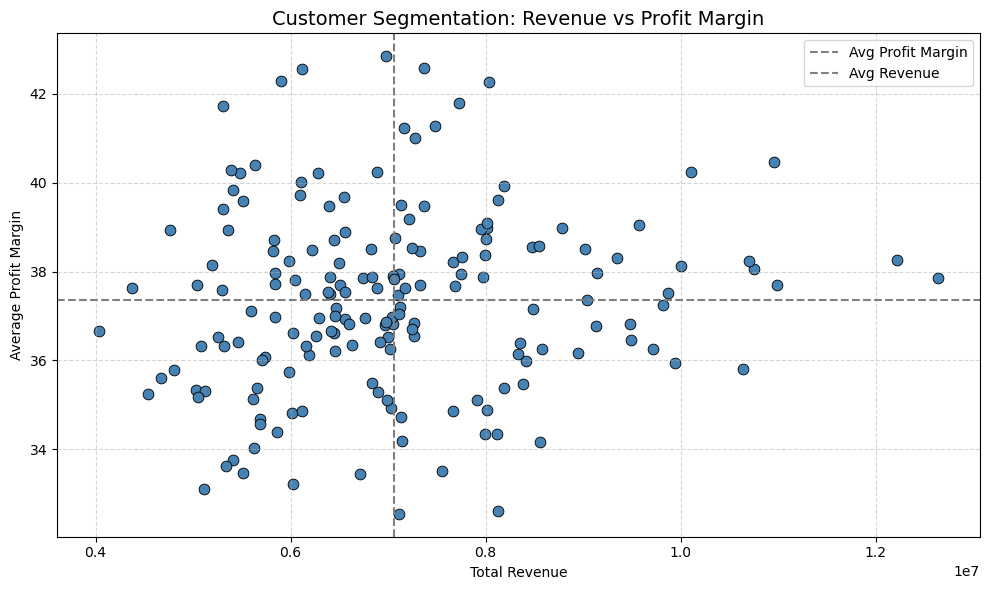

In [157]:

customer_metrics = df.groupby('customer names').agg({
    'revenue': 'sum',
    'profit margin': 'mean'
}).reset_index()

# Plot scatter plot
plt.figure(figsize=(10, 6))
sn.scatterplot(data=customer_metrics, x='revenue', y='profit margin', s=60, color='steelblue', edgecolor='black')

# Highlight quadrant lines (optional)
plt.axhline(y=customer_metrics['profit margin'].mean(), color='gray', linestyle='--', label='Avg Profit Margin')
plt.axvline(x=customer_metrics['revenue'].mean(), color='gray', linestyle='--', label='Avg Revenue')

plt.title('Customer Segmentation: Revenue vs Profit Margin', fontsize=14)
plt.xlabel('Total Revenue')
plt.ylabel('Average Profit Margin')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


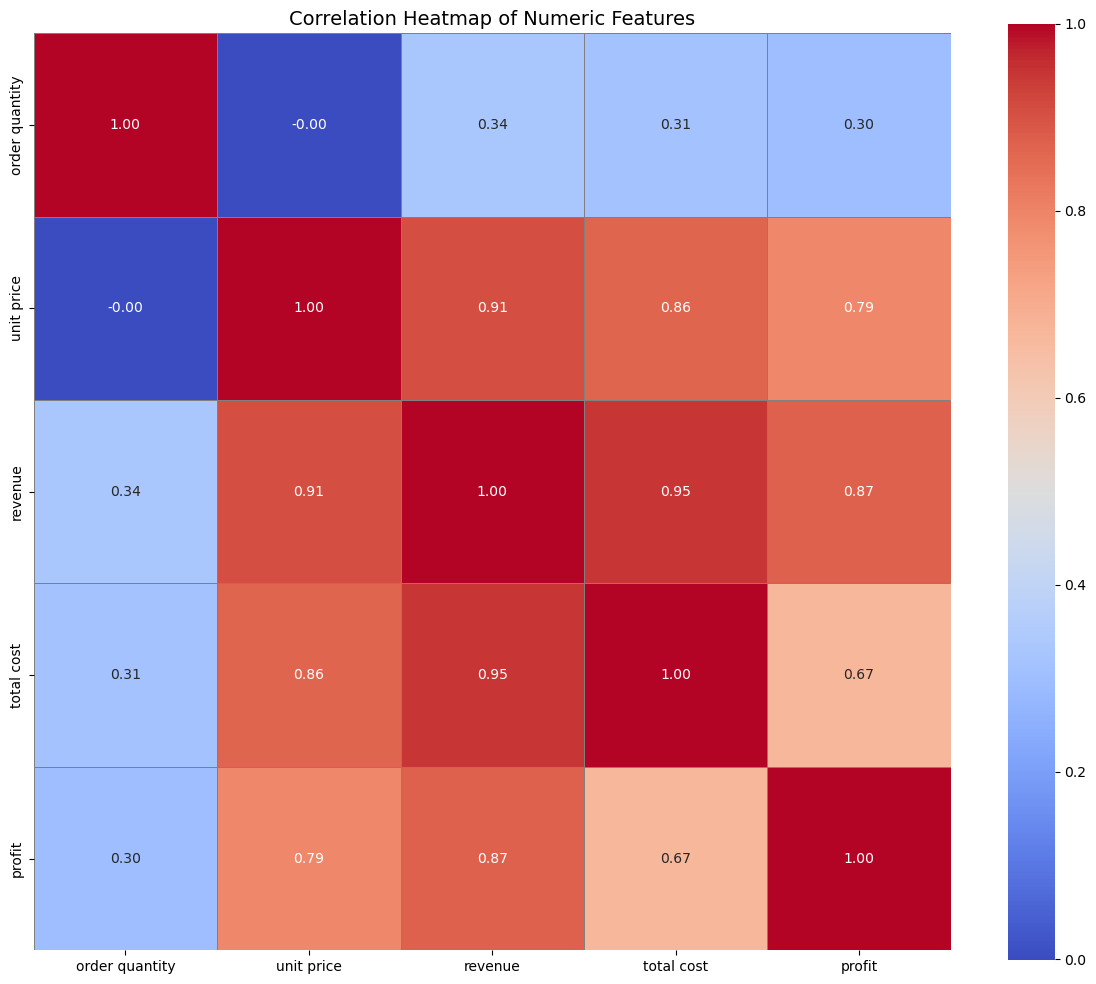

In [161]:
num_cols =['order quantity','unit price','revenue','total cost','profit']

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 12))
sn.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            linewidths=0.5, linecolor='gray', square=True, cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap of Numeric Features', fontsize=14)
plt.tight_layout()
plt.show()
